In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (20,20)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 70 # 200 e.g. is really fine, but slower%matplotlib inline

In [3]:
import sys
import os
import numpy as np
sys.path.append('../../../ASTRA_COMPARISONRunner-HMCC/')
sys.path.append('../../')

In [4]:
from Support.OMDirectory import load_directory, get_runs, save_summary_files

In [5]:
runs = get_runs(directory='../../../ASTRA_COMPARISONRunner-HMCC/')
runs

['45bd5347-aea9-4d90-9c0d-96b657361d41',
 'c66774e1-79b4-4151-889c-56131392f308',
 '0582e41a-87c4-429b-9d1c-41e0a25d514b',
 'a7e3abd8-0ef4-46a0-97c7-da97050f3458',
 'a34b58b6-2cd6-4966-9714-5c99c3f35514',
 'a1ef45e4-3dff-4ade-a812-7bca66e25dd9',
 'a60c64af-6981-44d3-9acc-e561c7ce3f9d',
 '3c1acb1f-847b-4ed5-a6e7-6fe846b1a2e7',
 'cf2fc785-5bae-4336-977e-96e138250218',
 '5c75320c-5c22-4681-84e2-9a26f75e3053',
 '465e33ef-a587-436d-99c6-56467c17f5f3',
 '90d30ec0-ead5-49a2-9484-ae4baf51c387',
 '63019cbf-f548-4e96-b059-aa565b86ecd4',
 '2415768b-1002-4caa-b21a-2b366adc3a56',
 '24d5c331-0acc-4e51-830b-cb305f2bd3f0',
 'd2a2b157-b18f-487d-af37-2d06e14d92fe',
 '1e94ba8b-8f80-499a-b28e-01cfd7d1ba54',
 'c3cb2e19-0dd5-4a45-ae0c-1e53f018baca',
 '99fdaed0-e905-468c-acf6-660de076e87d',
 'be022b20-abeb-4df0-be17-b56aa41d7dc0']

In [21]:
omdir=load_directory(id=runs[-1], directory='../../../ASTRA_COMPARISONRunner-HMCC/')

In [22]:
# Create summary files (which might not exist!)
omdir.save_summary_files()

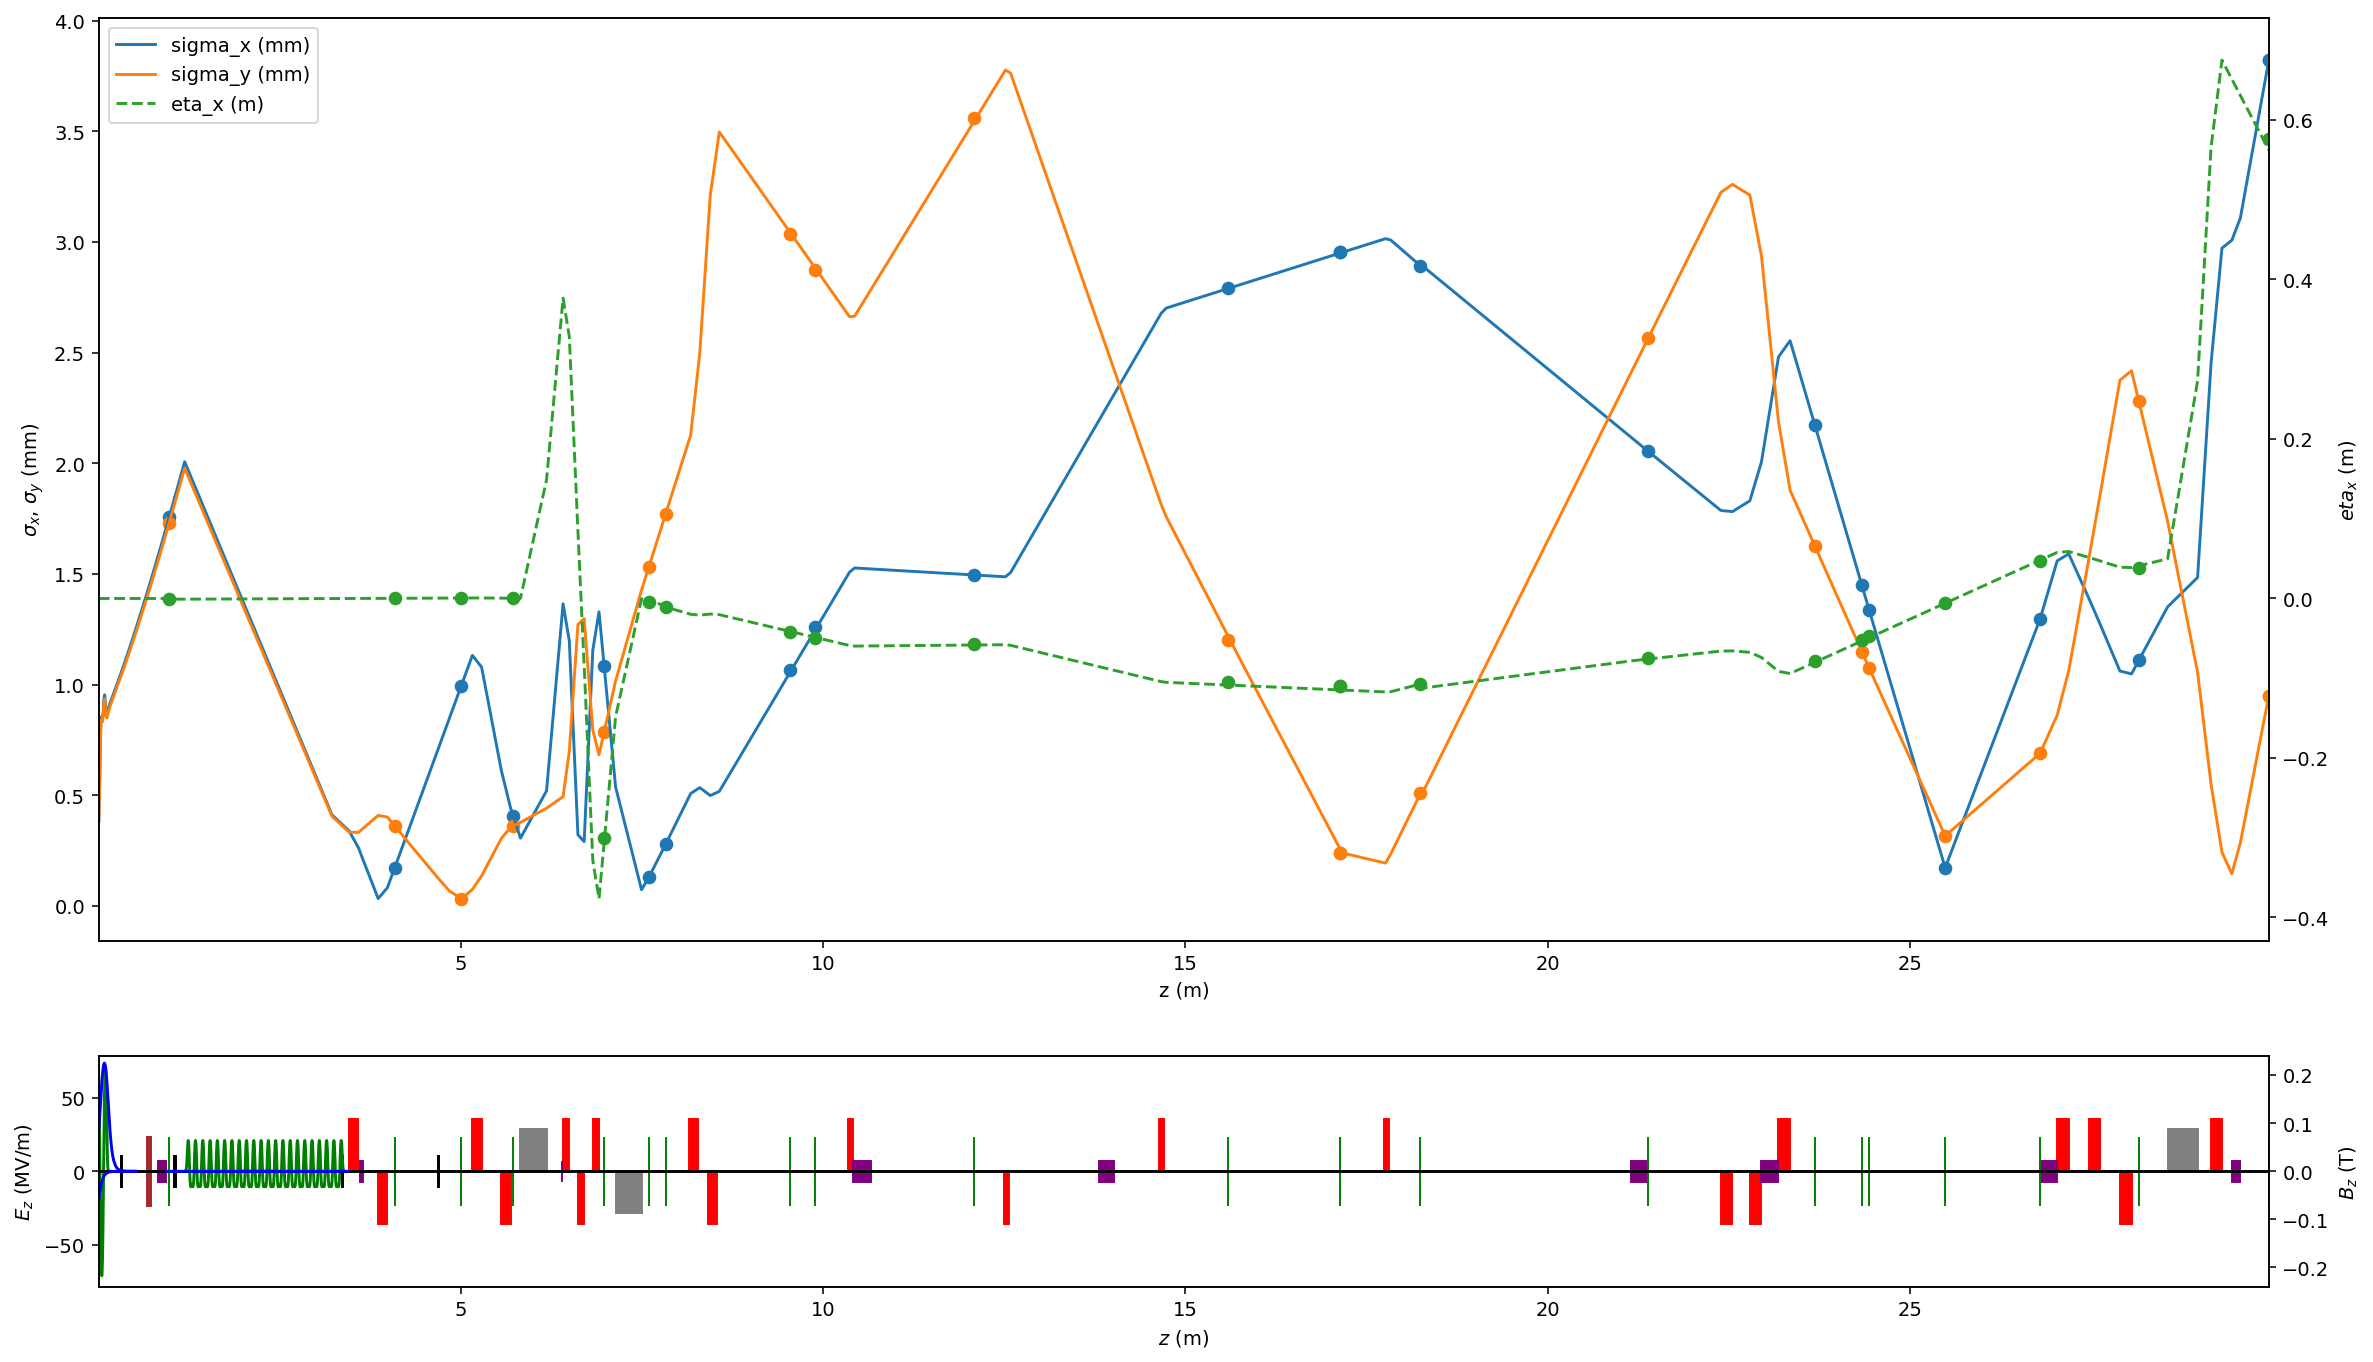

In [23]:
omdir.plot(include_particles=True, include_layout=True, limits=[0,30], ykeys=['sigma_x', 'sigma_y'],ykeys2=['eta_x'])

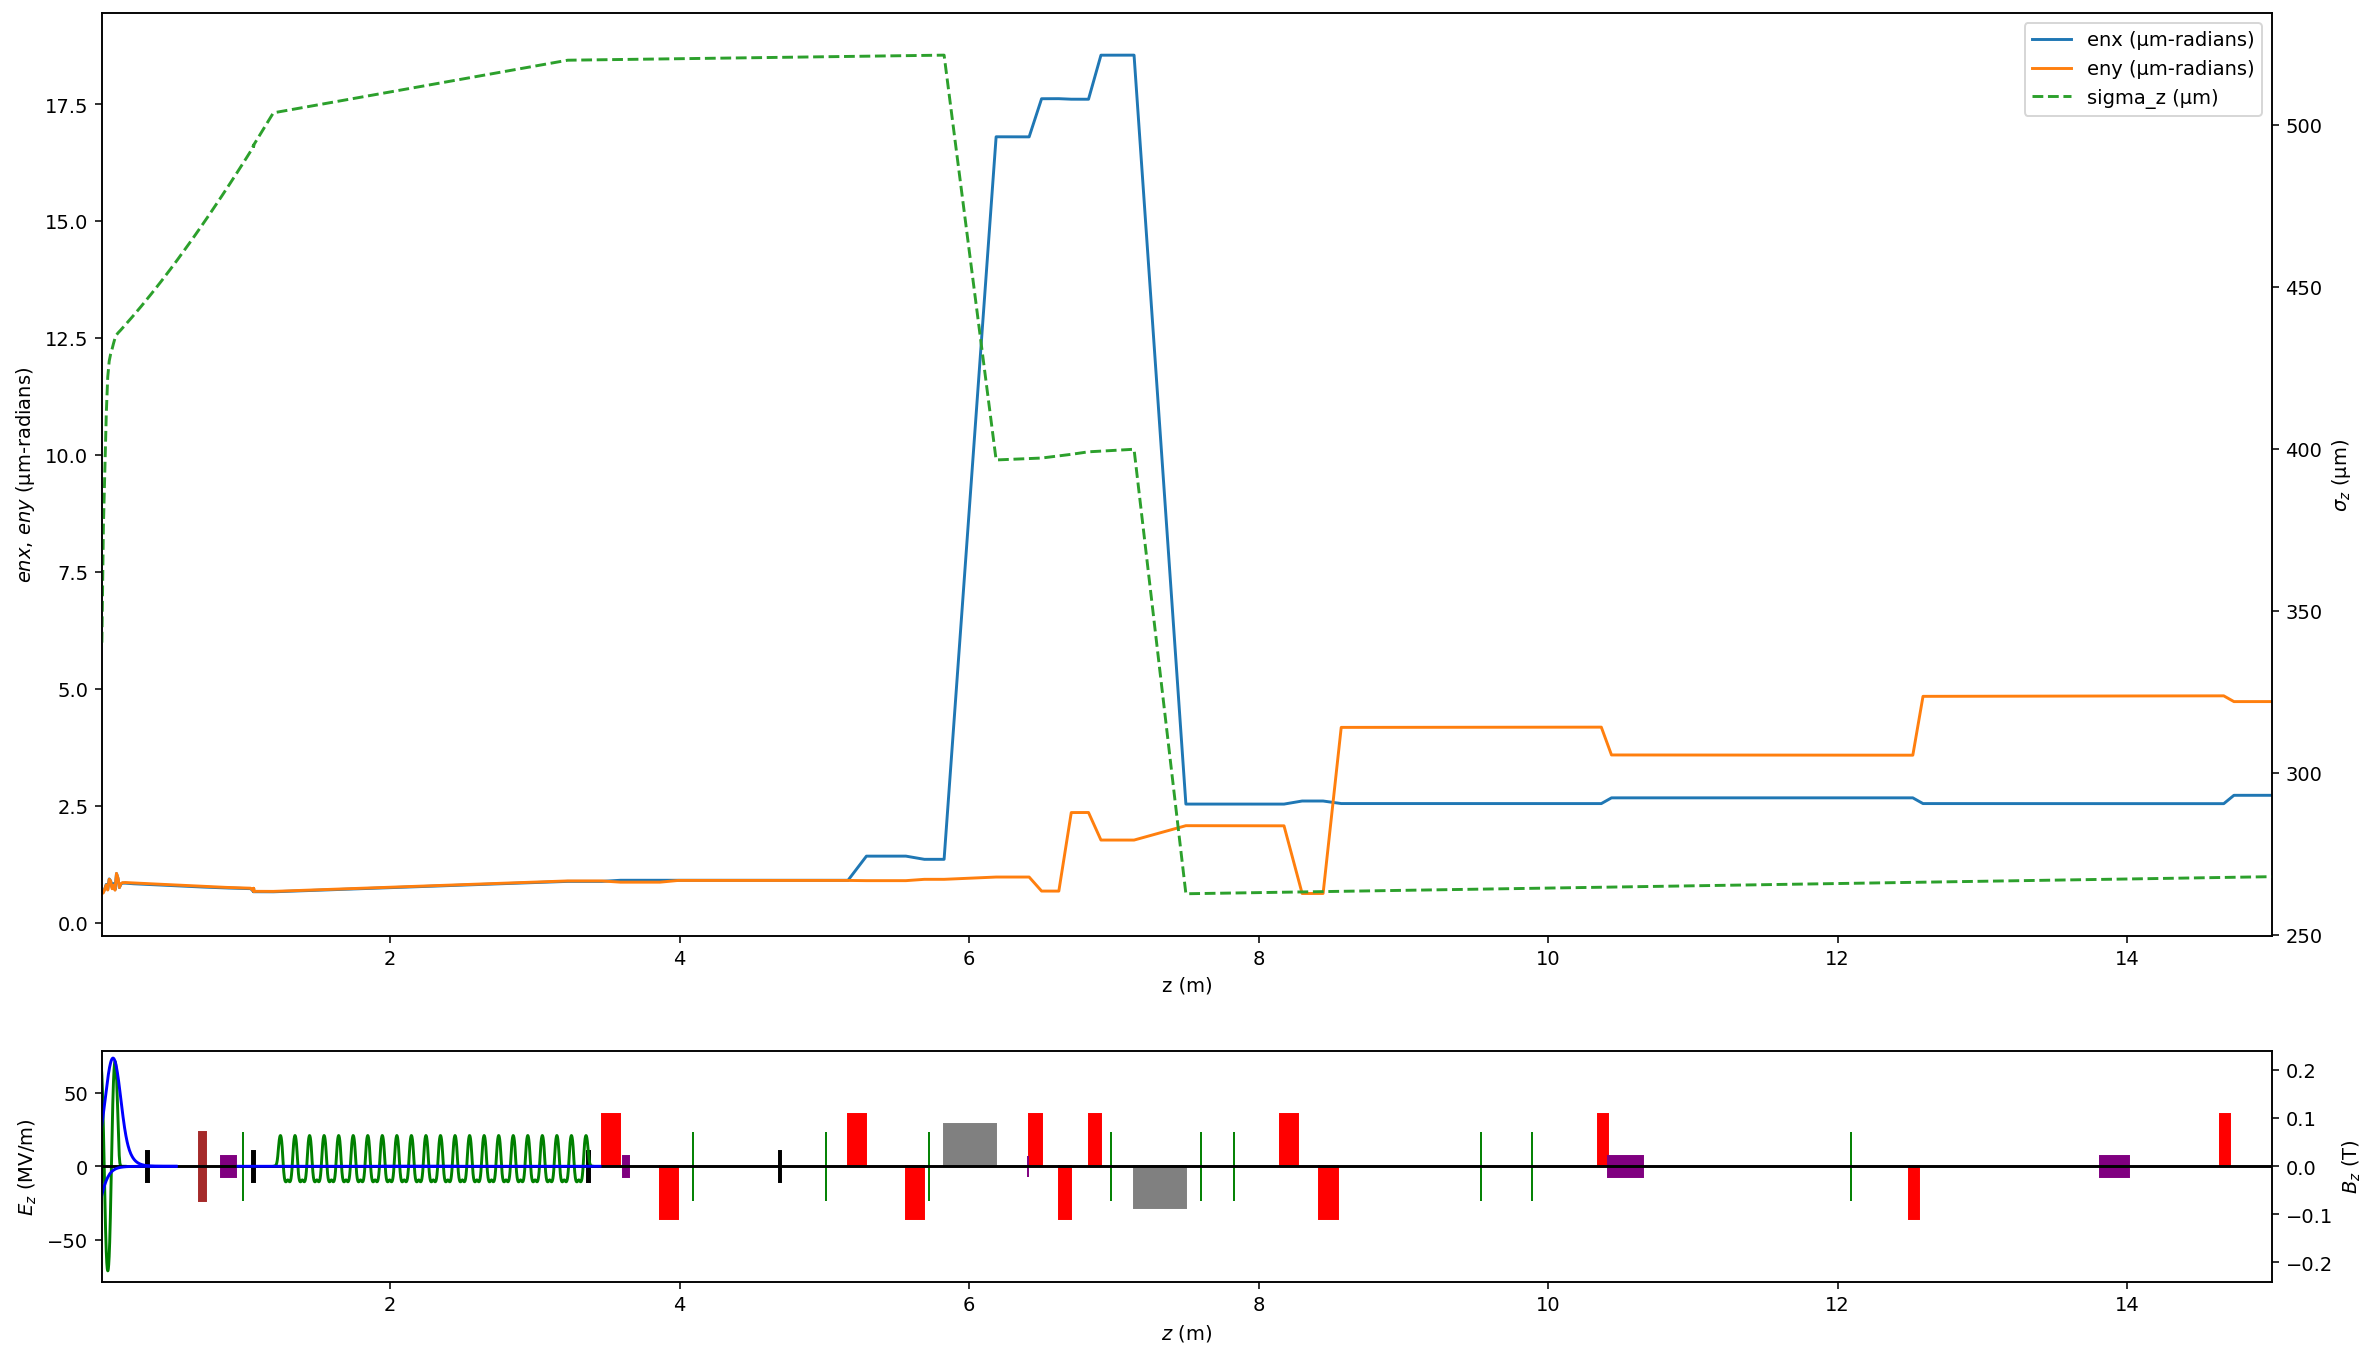

In [24]:
omdir.plot(include_particles=False, include_layout=True, ykeys=['enx', 'eny'],ykeys2=['sigma_z'], limits=[0,15])

In [25]:
omdir.element('CLA-S02-MAG-QUAD-01')

{'buffer_start': [0, 0, 3.44808],
 'csr_bins': 200,
 'csr_enable': True,
 'current_bins': 0,
 'field_integral_coefficients': [-2.23133410405682e-10,
                                 4.5196171252132e-08,
                                 -3.46208258004659e-06,
                                 0.000111195870210961,
                                 0.0238129337415767,
                                 0.00981229429460256],
 'global_rotation': [0, 0, 0],
 'isr_enable': True,
 'k1l': 1.79,
 'length': 0.12868478212775,
 'longitudinal_wakefield_enable': True,
 'lsc_bins': 200,
 'lsc_enable': True,
 'position_end': [0.0, 0, 3.59149],
 'position_errors': [0, 0, 0],
 'position_start': [0.0, 0, 3.46281],
 'rotation_errors': [0, 0, 0],
 'sr_enable': True,
 'strength_errors': [0],
 'transverse_wakefield_enable': True,
 'type': 'quadrupole'}


In [26]:
omdir.twiss.interpolate(5, 'sigma_x')

0.0009851205567111207

# Screen Images

In [27]:
omdir.screens

['Laser',
 'CLA-S01-DIA-SCR-01',
 'CLA-S02-DIA-SCR-01',
 'CLA-S02-DIA-SCR-02',
 'CLA-C2V-MARK-01',
 'CLA-C2V-DIA-SCR-01',
 'CLA-C2V-MARK-02',
 'EBT-INJ-DIA-YAG-05',
 'EBT-INJ-DIA-YAG-06',
 'EBT-INJ-DIA-FCUP-02',
 'EBT-INJ-DIA-YAG-07',
 'EBT-INJ-DIA-YAG-08',
 'EBT-INJ-DIA-ICT-03',
 'EBT-INJ-DIA-YAG-10',
 'EBT-INJ-PSS-SHUT-02',
 'EBT-BA1-DIA-YAG-01',
 'EBT-BA1-LASERBOX-BEG',
 'EBT-BA1-LASERBOX-END',
 'EBT-BA1-COFFIN-BEG',
 'EBT-BA1-COFFIN-FOC',
 'EBT-BA1-COFFIN-END',
 'EBT-BA1-DIA-YAG-02',
 'EBT-BA1-DIA-YAG-03',
 'EBT-BA1-DIA-FCUP-01']

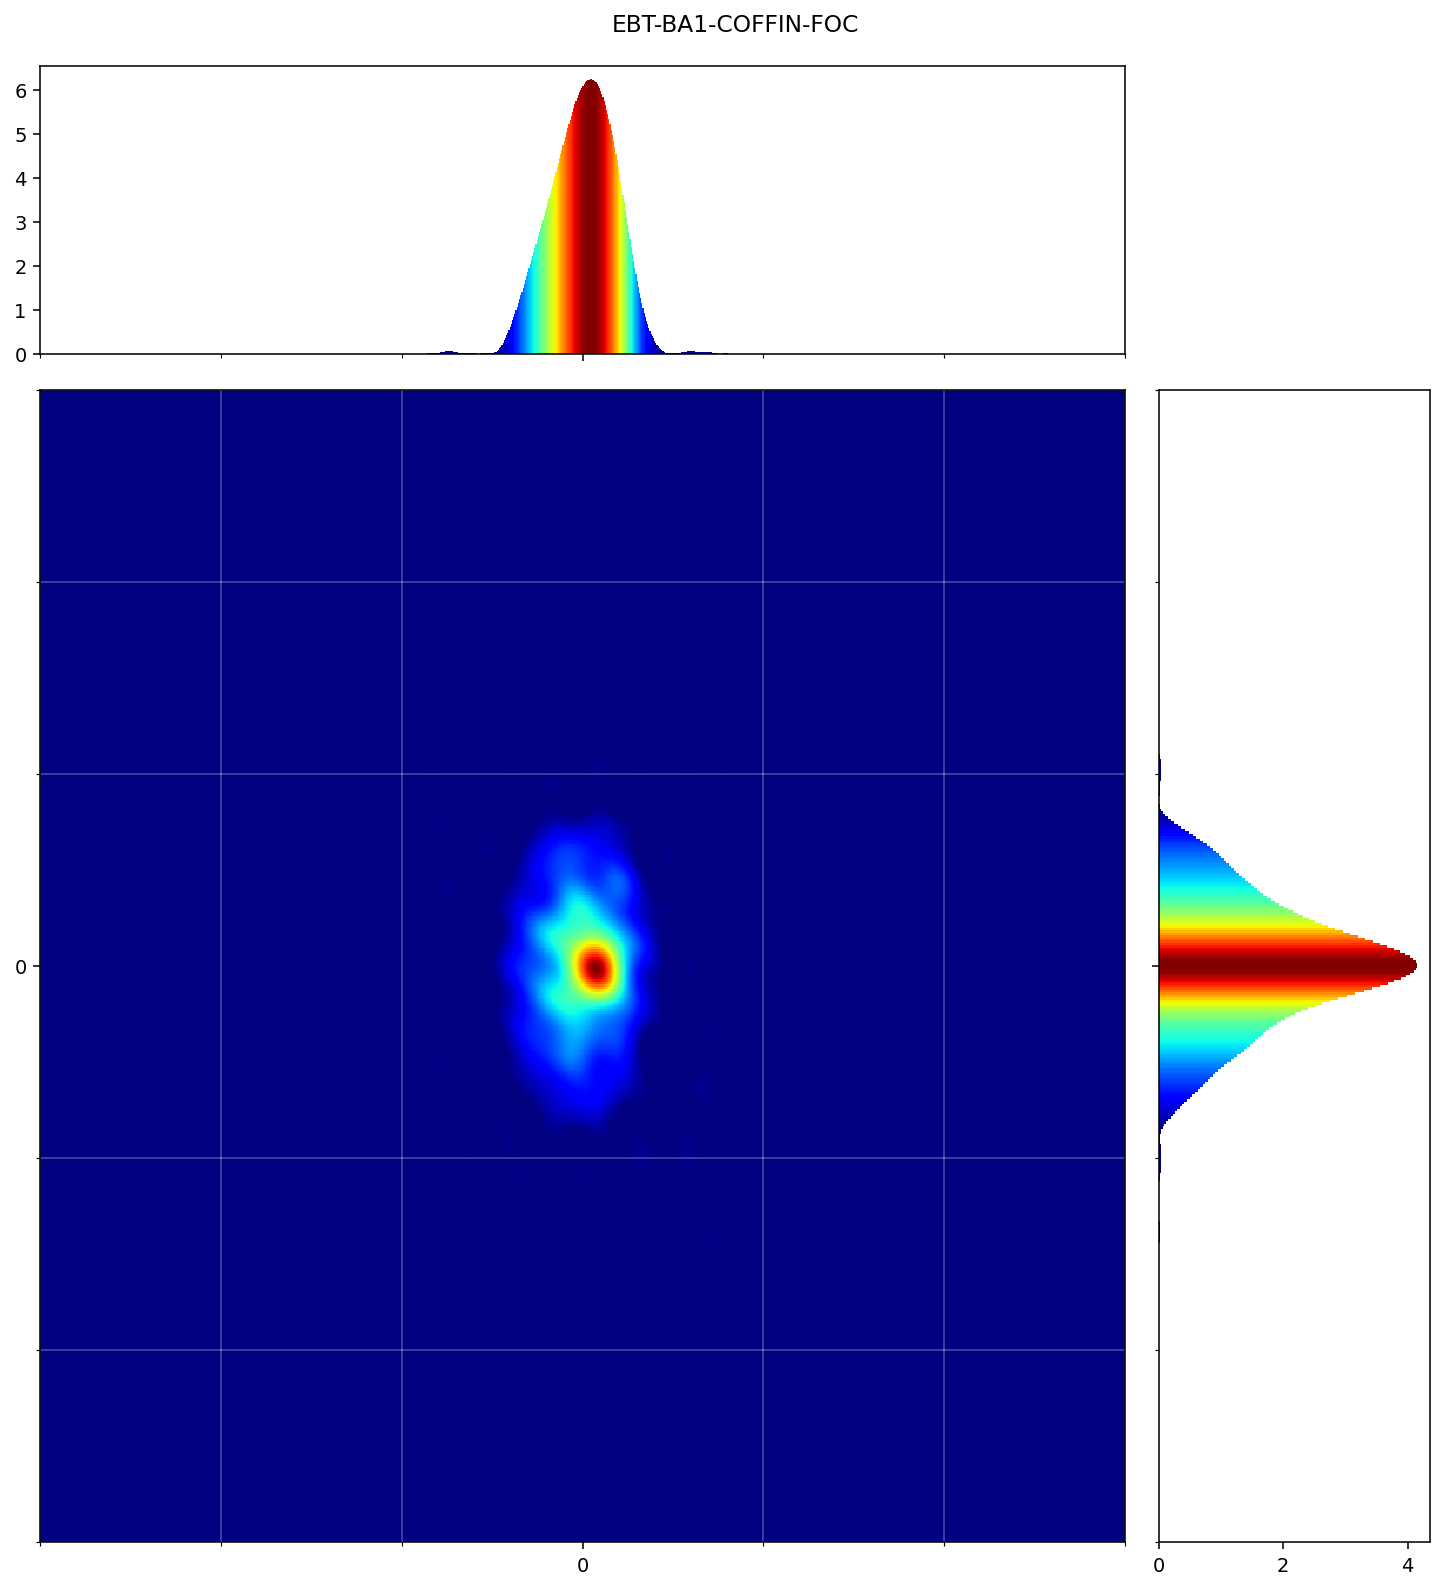

In [28]:
# See https://bitbucket.org/lbl-cascade/fastkde/src/master/fastkde/fastKDE.py for options to pass to fastKDE
omdir.getScreen('EBT-BA1-COFFIN-FOC').plotScreenImage(size=15, colormap=plt.cm.jet, marginals=True,
                                                      limits=3, numPointsPerSigma=20, screen=True)

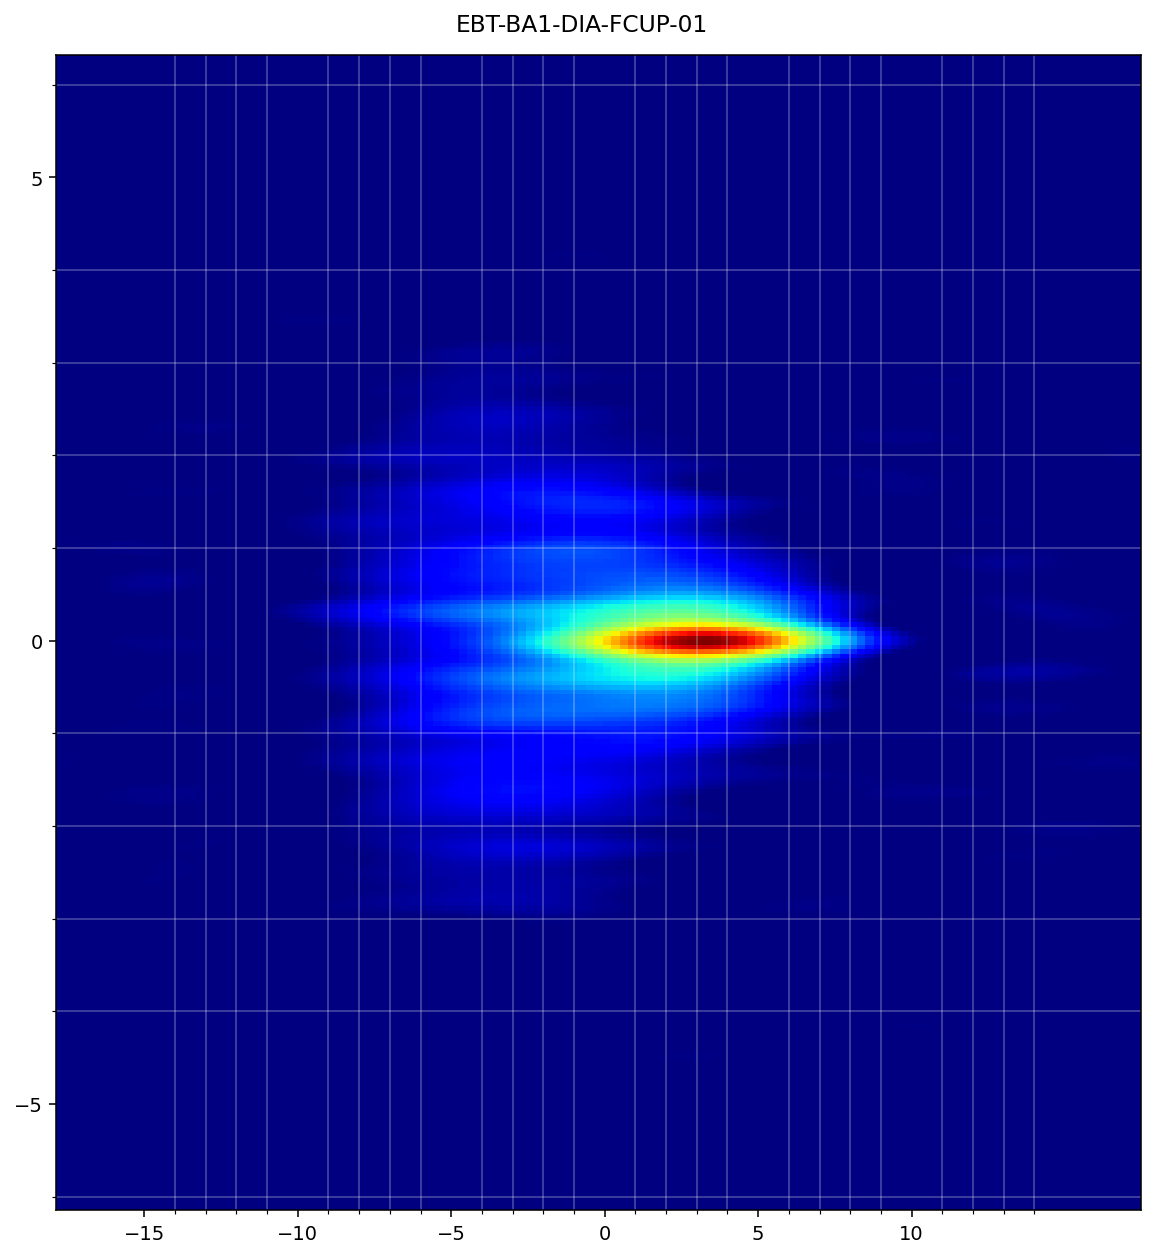

In [29]:
omdir.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=15, marginals=False, grid=True, 
                                                       screen=False)

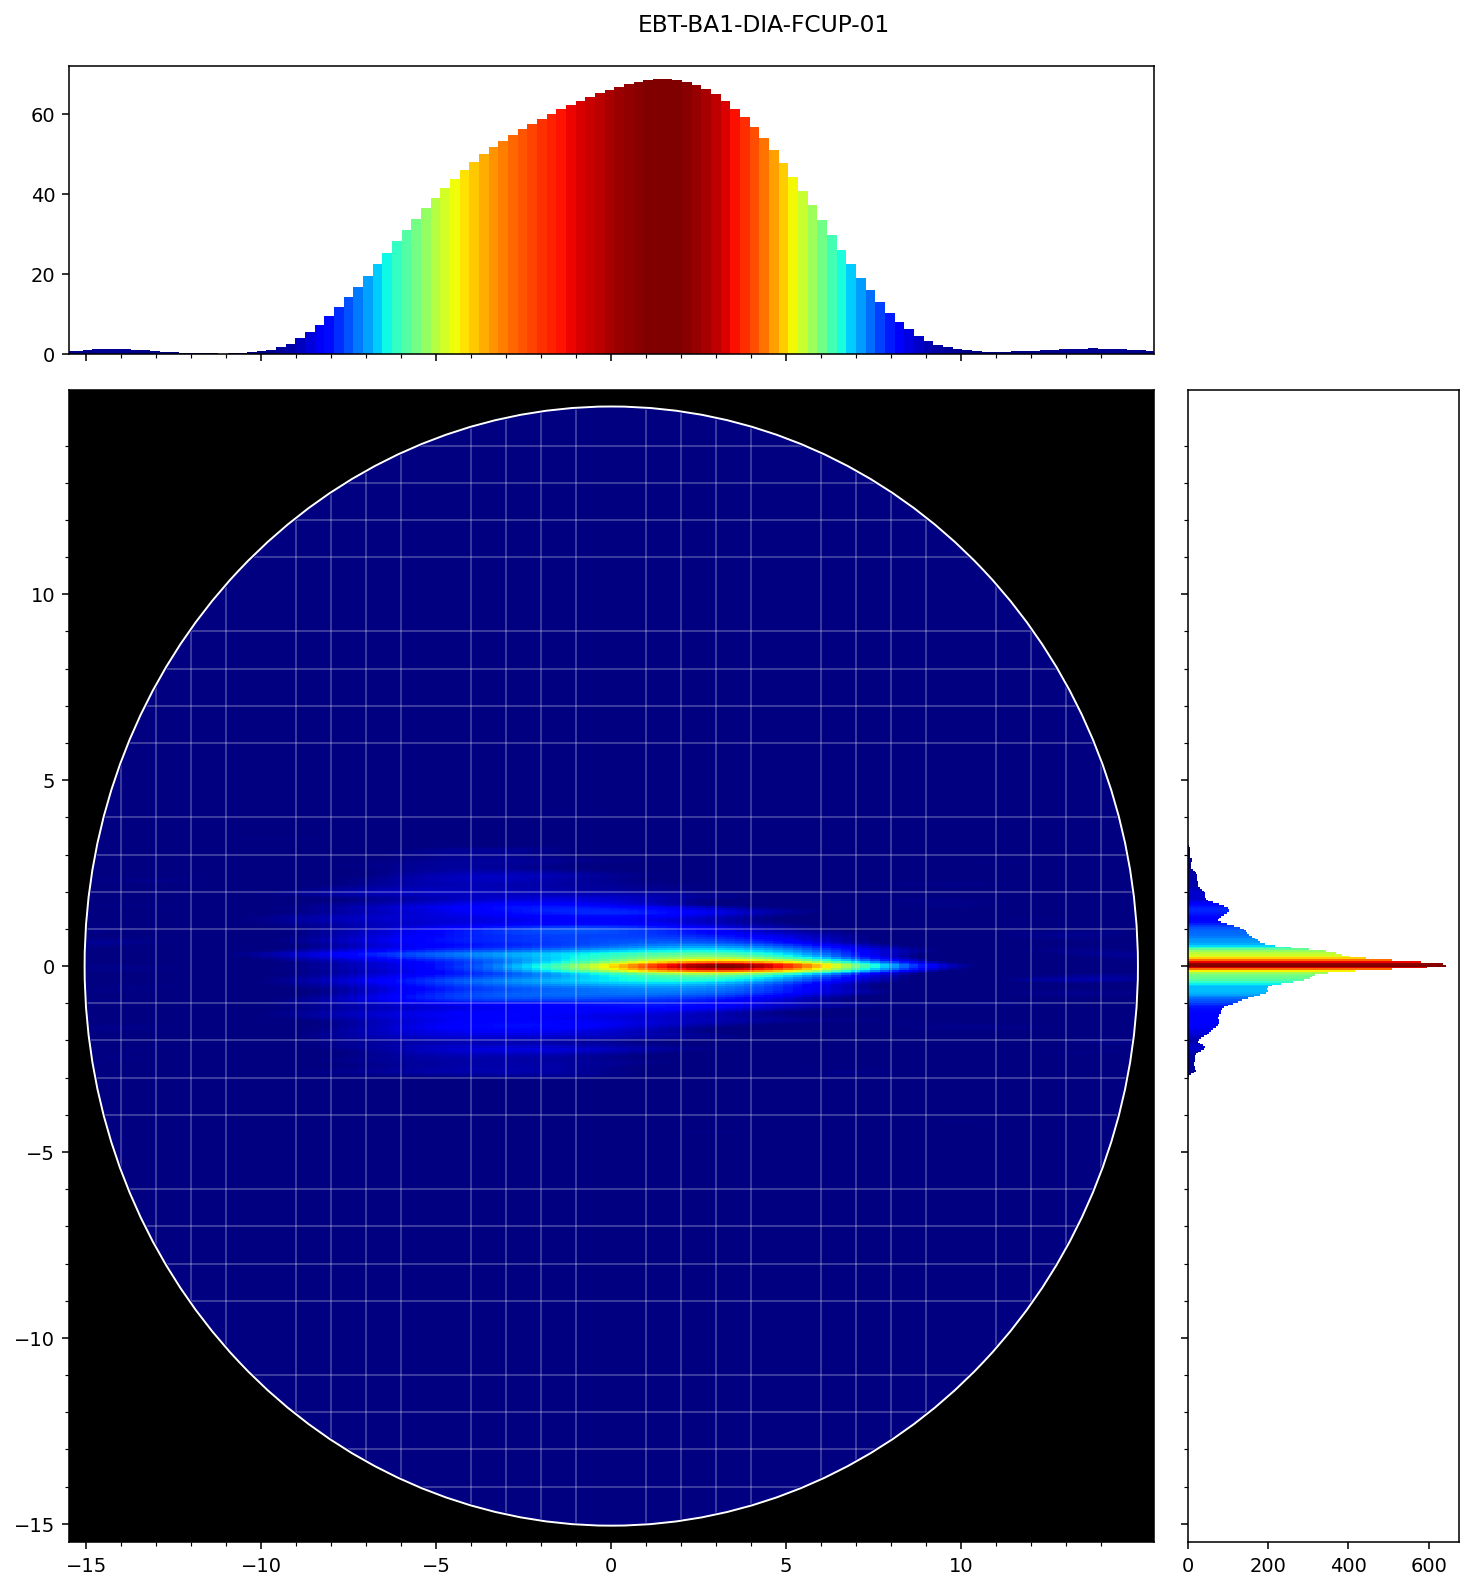

In [30]:
omdir.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=None, marginals=True, screen=True)